In [5]:
import scanpy as sc
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [6]:
raw_data = sc.read("../data/Tosches_turtle.h5ad", index_col=0)

In [7]:
processed_data = np.nan_to_num(raw_data.X, nan=0.0)
raw_data.X = processed_data
label = raw_data.obs['celltype']

In [8]:
print(processed_data.shape) # (n_cells, n_genes)

(18664, 23500)


In [18]:
print(raw_data.X)

<Compressed Sparse Row sparse matrix of dtype 'float32'
	with 40204097 stored elements and shape (18664, 23500)>
  Coords	Values
  (0, 5)	4.0
  (0, 8)	2.0
  (0, 9)	2.0
  (0, 10)	1.0
  (0, 13)	1.0
  (0, 14)	3.0
  (0, 16)	4.0
  (0, 17)	2.0
  (0, 19)	2.0
  (0, 21)	1.0
  (0, 22)	1.0
  (0, 23)	1.0
  (0, 29)	2.0
  (0, 34)	1.0
  (0, 44)	1.0
  (0, 45)	1.0
  (0, 47)	1.0
  (0, 48)	3.0
  (0, 59)	1.0
  (0, 61)	1.0
  (0, 64)	1.0
  (0, 74)	1.0
  (0, 75)	1.0
  (0, 77)	6.0
  (0, 79)	2.0
  :	:
  (18663, 22927)	1.0
  (18663, 22928)	2.0
  (18663, 22955)	1.0
  (18663, 22964)	1.0
  (18663, 22983)	1.0
  (18663, 23033)	1.0
  (18663, 23152)	1.0
  (18663, 23156)	2.0
  (18663, 23157)	1.0
  (18663, 23170)	2.0
  (18663, 23185)	1.0
  (18663, 23187)	2.0
  (18663, 23191)	2.0
  (18663, 23192)	8.0
  (18663, 23193)	1.0
  (18663, 23253)	1.0
  (18663, 23276)	1.0
  (18663, 23289)	1.0
  (18663, 23302)	1.0
  (18663, 23339)	1.0
  (18663, 23360)	1.0
  (18663, 23363)	1.0
  (18663, 23404)	1.0
  (18663, 23480)	2.0
  (18663, 2349

In [20]:
print(raw_data.obs.columns)

Index(['cell_ontology_class', 'cell_ontology_id', 'cell_type1', 'dataset_name',
       'donor', 'gender', 'organ', 'organism', 'platform', 'region', 'sample',
       'celltype'],
      dtype='object')


In [17]:
print(raw_data.var)

Empty DataFrame
Columns: []
Index: [A1CF, A2ML1, A4GALT, A4GNT, AAAS, AACS, AADAT, AAED1, AAGAB, AAK1, AAMDC, AAMP, AANAT, AAR2, AARS, AARS2, AARSD1, AASDH, AASDHPPT, AASS, AATF, AATK, ABAT, ABCA1, ABCA12, ABCA13, ABCA2, ABCA3, ABCA4, ABCA7, ABCB10, ABCB11, ABCB5, ABCB7, ABCB8, ABCB9, ABCC10, ABCC2, ABCC3, ABCC4, ABCC5, ABCC8, ABCC9, ABCD1, ABCD2, ABCD3, ABCD4, ABCE1, ABCF1, ABCF2, ABCF3, ABCG1, ABCG2, ABCG4, ABCG5, ABCG8, ABHD1, ABHD10, ABHD11, ABHD12, ABHD12B, ABHD13, ABHD14A, ABHD14B, ABHD15, ABHD16A, ABHD16B, ABHD17A, ABHD17B, ABHD17C, ABHD2, ABHD3, ABHD4, ABHD5, ABHD6, ABHD8, ABI1, ABI2, ABI3, ABI3BP, ABL1, ABL2, ABLIM1, ABLIM2, ABLIM3, ABR, ABRA, ABRACL, ABT1, ABTB1, ABTB2, ACAA1, ACAA2, ACACA, ACACB, ACAD10, ACAD11, ACAD8, ACAD9, ACADL, ...]

[23500 rows x 0 columns]


In [ ]:
raise SystemExit

In [16]:
pca = PCA(n_components=2)
tsne = TSNE(n_components=2, random_state=42)
pca_result = pca.fit_transform(processed_data)
tsne_result = tsne.fit_transform(processed_data)

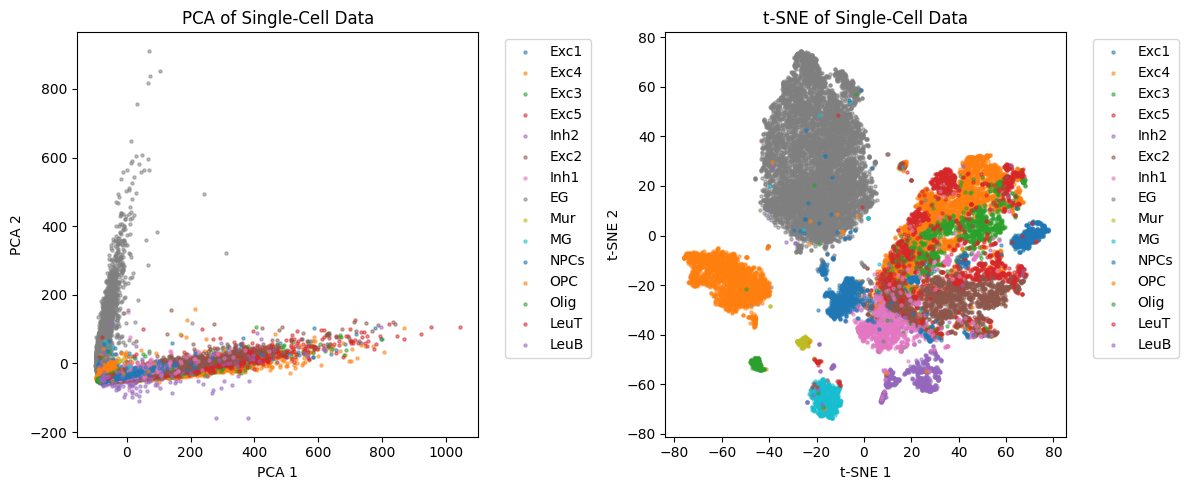

In [19]:
# Plot PCA result
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
for cell_type in label.unique():
    indices = label == cell_type
    plt.scatter(pca_result[indices, 0], pca_result[indices, 1], label=cell_type, alpha=0.5, s=5)
plt.title('PCA of Single-Cell Data')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
# Plot t-SNE result
plt.subplot(1, 2, 2)
for cell_type in label.unique():
    indices = label == cell_type
    plt.scatter(tsne_result[indices, 0], tsne_result[indices, 1], label=cell_type, alpha=0.5, s=5)
plt.title('t-SNE of Single-Cell Data')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()